# This script demonstrates the least square approximate solution
# Name : Sunjun Hwang
# Student ID : 20151766
# github link : https://github.com/tjswns494/Mathematical-Foundations-for-Computer-Vision-and-Machine-Learning-assignment.git

# import packages for handling images and manipulating data:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
from PIL import Image

# read and resize image

In [2]:
file_image	= 'cau.jpg'
im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(height, width)  = im.shape


# print nose image with varying noise standard deviation

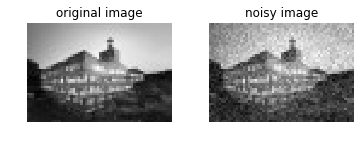

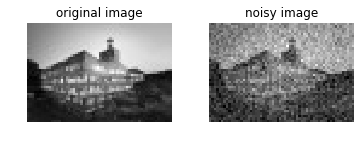

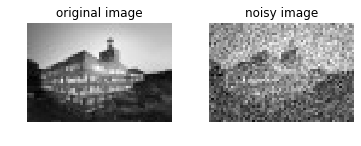

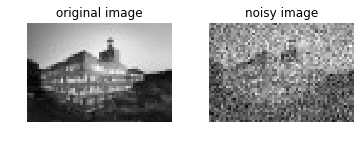

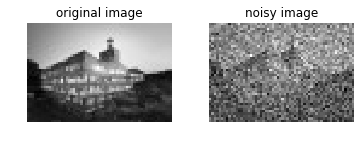

In [3]:
noise_std   = [0.2,0.4,0.6,0.8,1]
for i in range (len(noise_std)):
    noise=np.random.normal(0, noise_std[i], (height, width))
    im_noise=im+noise
    p1 = plt.subplot(2,2,1)
    p1.set_title('original image')
    plt.imshow(im, cmap='gray')
    plt.axis('off')

    p2 = plt.subplot(2,2,2)
    p2.set_title('noisy image')
    plt.imshow(im_noise, cmap='gray')
    plt.axis('off')

    plt.show()
noise=np.random.normal(0, noise_std[0], (height, width))
im_noise=im+noise

# define matrix Dx and Dy

In [4]:
dx= np.zeros((height*(width-1),height*width))
dy=np.zeros((width*(height-1),height*width))
for i in range(width*height):
    for j in range(height*(width-1)):
        dx[j][j]=-1
        dx[j][j+height]=1
dh=np.zeros((height-1,height))
for i in range(height):
    for j in range(height-1):
        dh[j][j]=-1
        dh[j][j+1]=1
dy=np.kron(np.eye(width), dh)

# define b

In [6]:
w=im_noise.T.flatten()
b=np.concatenate((w,np.zeros(height*(width-1)),np.zeros((height-1)*width)),axis=0)

# present the reconstruction image with varying regularization parameter lamda

landa is 0.125


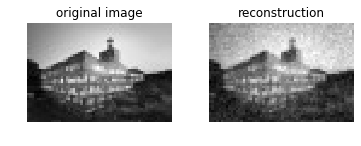

landa is 0.25


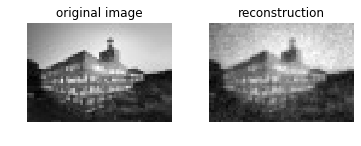

landa is 0.5


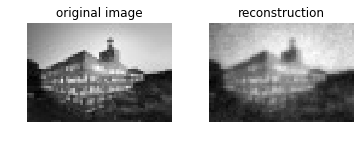

landa is 1


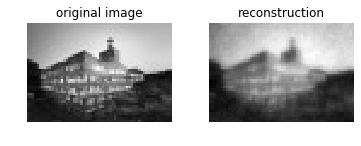

landa is 2


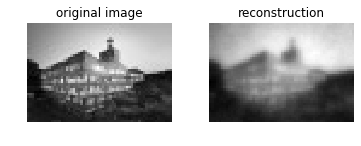

landa is 4


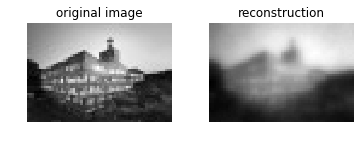

landa is 8


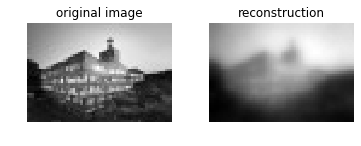

In [8]:
landa=[pow(2,-3),pow(2,-2),pow(2,-1),pow(2,0),pow(2,1),pow(2,2),pow(2,3)]
error=np.zeros(len(landa))
for i in range(len(landa)):
    A=np.concatenate((np.eye(height*width),landa[i]**0.5*dx,landa[i]**0.5*dy),axis=0)
    lsp=np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
    im_recon    = im1=lsp.reshape(width,height).T
    noise_recon = im_noise - im_recon
    error[i]       = np.linalg.norm(im - im_recon)
    print("landa is "+str(landa[i]))
    p1 = plt.subplot(2,2,1)
    p1.set_title('original image')
    plt.imshow(im, cmap='gray')
    plt.axis('off')

    p2 = plt.subplot(2,2,2)
    p2.set_title('reconstruction')
    plt.imshow(im_recon, cmap='gray')
    plt.axis('off')

    plt.show()

# present the reconstruction error

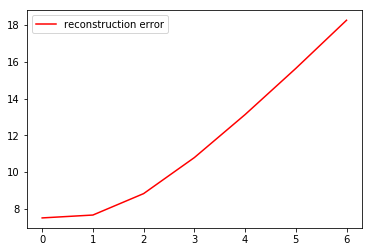

In [11]:
plt.figure()
plt.plot(error,color='r',label='reconstruction error')
plt.legend()
plt.show()